In [39]:
import pandas as pd
import scipy, researchpy
from researchpy import ttest
import os
from glob2 import glob
import numpy as np
import json
import mpu.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [579]:
exp = ['1 reg',
'2a interp',
'3a atlas',
'4a resamp',
'4 n4',
'4 susan',
'4 hist',
'5 ss']
gbm_100 = [42.3,83.1,83.6,83.7,82.7,83.8,82.1,86.0]
gbm_300 = [43.6,84.8,84.6,85.0,82.4,84.5,83.3,86.6]
bgpd_100 = [34.1,70.2,71.6,71.4,71.7,70.9,72.0,75.3]
bgpd_300 = [35.9,72.3,74.9,73.4,74.6,73.6,74.6,75.7]
gbm_unetr = [39.3,81.7,81.8,82.7,80.0,82.7,81.1,85.0]
bgpd_unetr = [34.3,66.4,67.3,66.8, 68.4,68.8,67.7,71.5]

gbm_100_std = [0.27,0.13,0.12,0.13,0.13,0.12,0.17,0.11]
gbm_300_std = [0.28,0.11,0.11,0.12,0.13,0.12,0.16,0.11]
bgpd_100_std =[0.28,0.19,0.20,0.19,0.18,0.19,0.17,0.16]
bgpd_300_std = [0.29,0.19,0.17,0.18,0.18,0.18,0.17,0.15]
gbm_unetr_std = [0.26,0.13,0.13,0.12,0.13,0.13,0.16,0.11]
bgpd_unetr_std = [0.30,0.21,0.21,0.22,0.20,0.22,0.19,0.18]
df = pd.DataFrame({ 'GBM_100': gbm_100, 'BGPD_100': bgpd_100, 'GBM_300': gbm_300, 'BGPD_300': bgpd_300, 'GBM_unetr': gbm_unetr, 'BGPD_unetr': bgpd_unetr}, index=exp)

In [98]:
df.T

,1 reg,2a interp,3a atlas,4a resamp,4 n4,4 susan,4 hist,5 ss
GBM_100,42.3,83.1,83.6,83.7,82.7,83.8,82.1,86.0
BGPD_100,34.1,70.2,71.6,71.4,71.7,70.9,72.0,75.3
GBM_300,43.6,84.8,84.6,85.0,82.4,84.5,83.3,86.6
BGPD_300,35.9,72.3,74.9,73.4,74.6,73.6,74.6,75.7
GBM_unetr,39.3,81.7,81.8,82.7,80.0,82.7,81.1,85.0
BGPD_unetr,34.3,66.4,67.3,66.8,0.0,68.8,67.7,71.5


In [217]:
df[df.columns[2]][1:]

2a interp    84.8
3a atlas     84.6
4a resamp    85.0
4 n4         82.4
4 susan      84.5
4 hist       83.3
5 ss         86.6
Name: GBM_300, dtype: float64

In [588]:
np.std([45,45,46])

0.4714045207910317

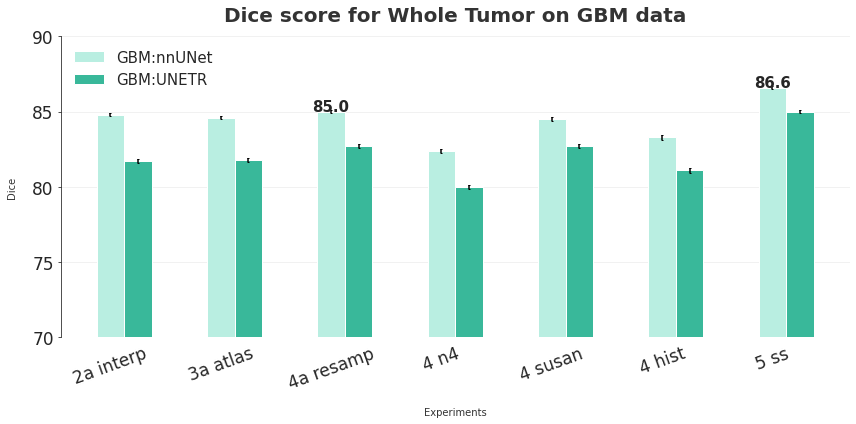

In [600]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(0,(len(df)-1)*0.8,0.8)
width = 0.2
# plt.bar(x, df[df.columns[0]],
#         width, color='#DEF3F0', label=df.columns[0])
plt.bar(x, df[df.columns[2]][1:],
        width, color='#B9EEE1', label='GBM:nnUNet',yerr=gbm_300_std[1:],capsize=1)
ax.text(2-0.4,df[df.columns[2]][3],df[df.columns[2]][3],
      horizontalalignment='center',
      weight='bold', fontsize=15
  )
plt.text(5-0.2,df[df.columns[2]][7],df[df.columns[2]][7], horizontalalignment='center',
      weight='bold', fontsize=15)

plt.bar(x+0.2, df[df.columns[4]][1:],
        width, color='#39B89A', label='GBM:UNETR',yerr=gbm_unetr_std[1:], capsize=1)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# plt.title('Dice score for Whole Tumor', fontsize=25)
# plt.xlabel(None)
plt.xticks(x, df.index[1:], fontsize=17, rotation=20)
plt.yticks(np.arange(0,100,5),fontsize=17)
sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15, loc='best')

ax.set_xlabel('Experiments', labelpad=15, color='#333333')
ax.set_ylabel('Dice', labelpad=15, color='#333333')
ax.set_title('Dice score for Whole Tumor on GBM data', pad=15, color='#333333',
             weight='bold', fontsize=20)
plt.axis('tight')
plt.ylim(70, 90)
fig.tight_layout()

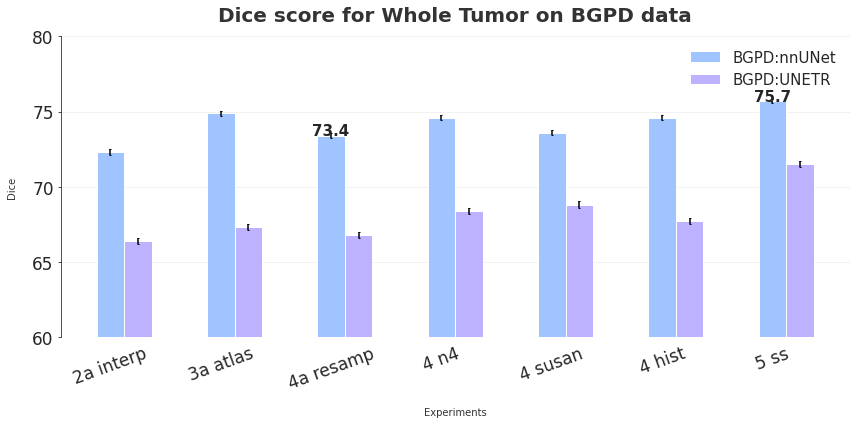

In [601]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(0,(len(df)-1)*0.8,0.8)
width = 0.2
plt.bar(x, df[df.columns[3]][1:],
        width, color='#A0C4FF', label='BGPD:nnUNet',yerr=bgpd_300_std[1:], capsize=1)
ax.text(2-0.4,df[df.columns[3]][3],df[df.columns[3]][3],
      horizontalalignment='center',
      weight='bold', fontsize=15
  )
plt.text(5-0.2,df[df.columns[3]][7],df[df.columns[3]][7], horizontalalignment='center',
      weight='bold', fontsize=15)

plt.bar(x+0.2, df[df.columns[5]][1:],
        width, color='#BDB2FF', label='BGPD:UNETR',yerr=bgpd_unetr_std[1:], capsize=1)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# plt.title('Dice score for Whole Tumor', fontsize=25)
# plt.xlabel(None)
plt.xticks(x, df.index[1:], fontsize=17, rotation=20)
plt.yticks(np.arange(0,100,5),fontsize=17)
sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15, loc='best')

ax.set_xlabel('Experiments', labelpad=15, color='#333333')
ax.set_ylabel('Dice', labelpad=15, color='#333333')
ax.set_title('Dice score for Whole Tumor on BGPD data', pad=15, color='#333333',
             weight='bold', fontsize=20)
plt.axis('tight')
plt.ylim(60, 80)
fig.tight_layout()

# Images with contours

In [488]:
from tqdm import tqdm
import ants
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from skimage.measure import find_contours
from scipy.ndimage import measurements
from skimage import exposure, img_as_ubyte

In [329]:
# best quality 
out_json = '/results/metrics/gbm/'
dataset = 'gbm'
task = 'gbm_4a_resamp'
fold = 'fold_0'
_columns = ['Ids','Dice_1', 'Dice_2', 'Dice_3',
                'Hausdorff95_1', 'Hausdorff95_2', 'Hausdorff95_3',
                'Sensitivity_1', 'Sensitivity_2', 'Sensitivity_3',
               'Specificity_1', 'Specificity_2', 'Specificity_3',
               'Surface_dice_1', 'Surface_dice_2', 'Surface_dice_3',
               'Precision_1', 'Precision_2', 'Precision_3']
metrics_all = pd.DataFrame(columns = _columns)
for i,sub in tqdm((enumerate(os.listdir(out_json)))):
    for sub_t in os.listdir(os.path.join(out_json, sub)):
        if f'{task}_epoch' in sub_t:
            if fold in sub_t:
                metrics = json.load(open(os.path.join(out_json, sub, sub_t)))
                metrics = metrics[dataset][task][fold.replace('_', '=')]
                for each in _columns:
                    metrics_all.at[i,'Ids'] = sub
                    if each != 'Ids':
                        metrics_all.at[i,each] = np.round(metrics[each],3)

102it [00:00, 240.49it/s]


In [407]:
metrics_all.sort_values(by=['Dice_1'],ascending=False)[:5]

,Ids,Dice_1,Dice_2,Dice_3,Hausdorff95_1,Hausdorff95_2,Hausdorff95_3,Sensitivity_1,Sensitivity_2,Sensitivity_3,Specificity_1,Specificity_2,Specificity_3,Surface_dice_1,Surface_dice_2,Surface_dice_3,Precision_1,Precision_2,Precision_3
40,TCGA-02-0085,0.968,0.924,0.9,0.781,6.5,3.906,0.959,0.883,0.865,1.0,1.0,1.0,0.97,0.883,0.914,0.978,0.969,0.94
54,TCGA-12-1098,0.962,0.908,0.905,1.953,1.953,2.0,0.961,0.841,0.83,1.0,1.0,1.0,0.929,0.858,0.858,0.963,0.987,0.996
68,TCGA-08-0512,0.957,0.948,0.923,1.811,1.5,1.5,0.935,0.93,0.877,1.0,1.0,1.0,0.692,0.729,0.718,0.981,0.966,0.975
75,TCGA-02-0106,0.956,0.935,0.89,1.562,2.471,2.344,0.927,0.882,0.815,1.0,1.0,1.0,0.935,0.857,0.904,0.987,0.996,0.981
26,TCGA-12-1598,0.955,0.885,0.825,2.009,6.289,4.581,0.954,0.817,0.717,0.999,1.0,1.0,0.923,0.771,0.787,0.956,0.966,0.972


In [400]:
def draw_contours(image, mask):
    """Draw 3 x 4 matplotlib axes with imshow 3D slice and GTV contour overlay."""
    
#     assert(image.shape == mask.shape)
    contours = find_contours(mask[25:175,10:,])
    fig = plt.figure(figsize=(8,4))
    plt.axis('off')
    plt.imshow(image[25:175,10:,:], cmap='gray')
    for cont in range(len(contours)):
            plt.plot(contours[cont][:, 1], contours[cont][:, 0], c='r');
    plt.show()
def to_lbl(pred):
    enh = pred[2]
    c1, c2, c3 = pred[0] > 0.5, pred[1] > 0.5, pred[2] > 0.5
    pred = (c1 > 0).astype(np.uint8)
    pred[(c2 == False) * (c1 == True)] = 2
    pred[(c3 == True) * (c1 == True)] = 3

    components, n = measurements.label(pred == 3)
    for et_idx in range(1, n + 1):
        _, counts = np.unique(pred[components == et_idx], return_counts=True)
        if 1 < counts[0] and counts[0] < 8 and np.mean(enh[components == et_idx]) < 0.9:
            pred[components == et_idx] = 1

    et = pred == 3
    if 0 < et.sum() and et.sum() < 73 and np.mean(enh[et]) < 0.9:
        pred[et] = 1
    pred = np.transpose(pred, (2, 1, 0)).astype(np.uint8)
    return pred


In [385]:
crop=[[25:175,10:,:],[],[45:215,20:220,:]]

SyntaxError: invalid syntax (3442793646.py, line 1)

(200, 200, 143)
(200, 200, 143, 4)
[91]


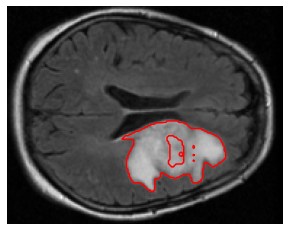

In [401]:
fname = 'TCGA-02-0085'
img = nib.load(f"/data/private_data/gbm/gbm_4a_resamp/images/{fname}.nii.gz").get_fdata().astype(np.float32)
label = nib.load(f"/data/private_data/gbm/gbm_4a_resamp/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)
predict = np.load(f"/results/gbm_infer/gbm_4a_resamp/predictions_best_epoch=197-dice_mean=78_14_task=38_fold=0_tta/{fname}.npy.npz")['arr_0']
mask = to_lbl(predict)
print(mask.shape)
print(img.shape)
l = np.argsort(label.sum(axis=(0,1)))[-1:]
print(l)
draw_contours(img[:, :, l, 0],mask[:,:,l].squeeze())

In [418]:
# best quality 
out_json = '/results/metrics/gbm/'
dataset = 'gbm'
task = 'gbm_4b_n4_300'
fold = 'fold_2'
_columns = ['Ids','Dice_1', 'Dice_2', 'Dice_3',
                'Hausdorff95_1', 'Hausdorff95_2', 'Hausdorff95_3',
                'Sensitivity_1', 'Sensitivity_2', 'Sensitivity_3',
               'Specificity_1', 'Specificity_2', 'Specificity_3',
               'Surface_dice_1', 'Surface_dice_2', 'Surface_dice_3',
               'Precision_1', 'Precision_2', 'Precision_3']
metrics_all = pd.DataFrame(columns = _columns)
for i,sub in tqdm((enumerate(os.listdir(out_json)))):
    for sub_t in os.listdir(os.path.join(out_json, sub)):
        if f'{task}_epoch' in sub_t:
            if fold in sub_t:
                check = os.path.join(out_json, sub, sub_t)
                metrics = json.load(open(os.path.join(out_json, sub, sub_t)))
                metrics = metrics[dataset][task][fold.replace('_', '=')]
                for each in _columns:
                    metrics_all.at[i,'Ids'] = sub
                    if each != 'Ids':
                        metrics_all.at[i,each] = np.round(metrics[each],3)
print(check)
metrics_all.sort_values(by=['Dice_1'],ascending=False)[:5]

102it [00:00, 397.18it/s]

/results/metrics/gbm/TCGA-06-5417/gbm_4b_n4_300_epoch_234-dice_mean_75_86_task_44_fold_2_tta.json


,Ids,Dice_1,Dice_2,Dice_3,Hausdorff95_1,Hausdorff95_2,Hausdorff95_3,Sensitivity_1,Sensitivity_2,Sensitivity_3,Specificity_1,Specificity_2,Specificity_3,Surface_dice_1,Surface_dice_2,Surface_dice_3,Precision_1,Precision_2,Precision_3
40,TCGA-02-0085,0.966,0.915,0.872,1.105,6.5,4.941,0.97,0.853,0.789,0.999,1.0,1.0,0.96,0.856,0.879,0.961,0.986,0.973
54,TCGA-12-1098,0.96,0.921,0.923,2.0,1.761,1.761,0.941,0.86,0.86,1.0,1.0,1.0,0.928,0.894,0.909,0.979,0.991,0.995
63,TCGA-76-6657,0.957,0.96,0.901,2.033,1.607,1.438,0.942,0.942,0.844,0.999,1.0,1.0,0.908,0.911,0.919,0.972,0.979,0.965
26,TCGA-12-1598,0.956,0.853,0.707,1.797,6.562,6.5,0.948,0.758,0.556,0.999,1.0,1.0,0.93,0.68,0.638,0.964,0.976,0.97
75,TCGA-02-0106,0.955,0.944,0.859,1.562,2.344,2.471,0.945,0.901,0.763,0.999,1.0,1.0,0.926,0.887,0.879,0.965,0.992,0.983


(200, 200, 143)
(200, 200, 143, 4)
[91]


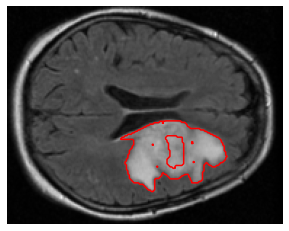

In [425]:
fname = 'TCGA-02-0085'
img = nib.load(f"/data/private_data/gbm/gbm_4b_n4/images/{fname}.nii.gz").get_fdata().astype(np.float32)
label = nib.load(f"/data/private_data/gbm/gbm_4b_n4/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)
predict = np.load(f"/data/newdata/gbm_infer/gbm_4b_n4_300/predictions_best_epoch=234-dice_mean=75_86_task=44_fold=2_tta/{fname}.npy.npz")['arr_0']
mask = to_lbl(predict)
print(mask.shape)
print(img.shape)
l = np.argsort(label.sum(axis=(0,1)))[-1:]
print(l)
draw_contours(img[:, :, l, 0],mask[:,:,l].squeeze())

In [419]:
# best quality 
out_json = '/results/metrics/gbm/'
dataset = 'gbm'
task = 'gbm_4d_susan_300'
fold = 'fold_2'
_columns = ['Ids','Dice_1', 'Dice_2', 'Dice_3',
                'Hausdorff95_1', 'Hausdorff95_2', 'Hausdorff95_3',
                'Sensitivity_1', 'Sensitivity_2', 'Sensitivity_3',
               'Specificity_1', 'Specificity_2', 'Specificity_3',
               'Surface_dice_1', 'Surface_dice_2', 'Surface_dice_3',
               'Precision_1', 'Precision_2', 'Precision_3']
metrics_all = pd.DataFrame(columns = _columns)
for i,sub in tqdm((enumerate(os.listdir(out_json)))):
    for sub_t in os.listdir(os.path.join(out_json, sub)):
        if f'{task}_epoch' in sub_t:
            if fold in sub_t:
                check = os.path.join(out_json, sub, sub_t)
                metrics = json.load(open(os.path.join(out_json, sub, sub_t)))
                metrics = metrics[dataset][task][fold.replace('_', '=')]
                for each in _columns:
                    metrics_all.at[i,'Ids'] = sub
                    if each != 'Ids':
                        metrics_all.at[i,each] = np.round(metrics[each],3)
print(check)
metrics_all.sort_values(by=['Dice_1'],ascending=False)[:5]

102it [00:00, 114.66it/s]

/results/metrics/gbm/TCGA-06-5417/gbm_4d_susan_300_epoch_263-dice_mean_75_78_task_45_fold_2_tta.json


,Ids,Dice_1,Dice_2,Dice_3,Hausdorff95_1,Hausdorff95_2,Hausdorff95_3,Sensitivity_1,Sensitivity_2,Sensitivity_3,Specificity_1,Specificity_2,Specificity_3,Surface_dice_1,Surface_dice_2,Surface_dice_3,Precision_1,Precision_2,Precision_3
40,TCGA-02-0085,0.97,0.925,0.893,0.781,6.5,4.419,0.956,0.88,0.834,1.0,1.0,1.0,0.976,0.887,0.909,0.984,0.975,0.962
75,TCGA-02-0106,0.959,0.958,0.902,1.562,1.562,1.747,0.945,0.93,0.838,1.0,1.0,1.0,0.943,0.931,0.922,0.973,0.988,0.976
26,TCGA-12-1598,0.958,0.884,0.83,2.695,10.018,6.5,0.979,0.832,0.747,0.998,1.0,1.0,0.928,0.768,0.796,0.937,0.943,0.934
54,TCGA-12-1098,0.958,0.929,0.937,2.0,1.465,1.465,0.937,0.879,0.891,1.0,1.0,1.0,0.924,0.919,0.935,0.98,0.985,0.987
68,TCGA-08-0512,0.956,0.946,0.921,1.5,1.5,1.5,0.928,0.916,0.871,1.0,1.0,1.0,0.688,0.709,0.698,0.986,0.977,0.976


(200, 200, 143)
(200, 200, 143, 4)
[91]


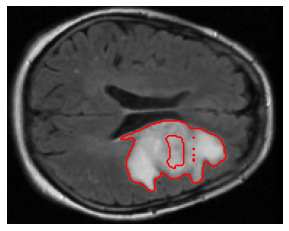

In [429]:
fname = 'TCGA-02-0085'
img = nib.load(f"/data/private_data/gbm/gbm_4d_susan/images/{fname}.nii.gz").get_fdata().astype(np.float32)
label = nib.load(f"/data/private_data/gbm/gbm_4d_susan/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)
predict = np.load(f"/data/newdata/gbm_infer/gbm_4d_susan_300/predictions_best_epoch=263-dice_mean=75_78_task=45_fold=2_tta/{fname}.npy.npz")['arr_0']
mask = to_lbl(predict)
print(mask.shape)
print(img.shape)
l = np.argsort(label.sum(axis=(0,1)))[-1:]
print(l)
draw_contours(img[:, :, l, 0],mask[:,:,l].squeeze())

In [432]:
# best quality 
out_json = '/results/metrics/gbm/'
dataset = 'gbm'
task = '6_histogram_fold_2'
fold = 'fold_2'
_columns = ['Ids','Dice_1', 'Dice_2', 'Dice_3',
                'Hausdorff95_1', 'Hausdorff95_2', 'Hausdorff95_3',
                'Sensitivity_1', 'Sensitivity_2', 'Sensitivity_3',
               'Specificity_1', 'Specificity_2', 'Specificity_3',
               'Surface_dice_1', 'Surface_dice_2', 'Surface_dice_3',
               'Precision_1', 'Precision_2', 'Precision_3']
metrics_all = pd.DataFrame(columns = _columns)
for i,sub in tqdm((enumerate(os.listdir(out_json)))):
    for sub_t in os.listdir(os.path.join(out_json, sub)):
        if f'{task}_epoch_243' in sub_t:
            if fold in sub_t:
                check = os.path.join(out_json, sub, sub_t)
                metrics = json.load(open(os.path.join(out_json, sub, sub_t)))
                metrics = metrics[dataset][task][fold.replace('_', '=')]
                for each in _columns:
                    metrics_all.at[i,'Ids'] = sub
                    if each != 'Ids':
                        metrics_all.at[i,each] = np.round(metrics[each],3)
print(check)
metrics_all.sort_values(by=['Dice_1'],ascending=False)[:5]

102it [00:00, 254.36it/s]

/results/metrics/gbm/TCGA-06-5417/6_histogram_fold_2_epoch_243-dice_mean_74_42_task_31.2_fold_2_tta.json


,Ids,Dice_1,Dice_2,Dice_3,Hausdorff95_1,Hausdorff95_2,Hausdorff95_3,Sensitivity_1,Sensitivity_2,Sensitivity_3,Specificity_1,Specificity_2,Specificity_3,Surface_dice_1,Surface_dice_2,Surface_dice_3,Precision_1,Precision_2,Precision_3
54,TCGA-12-1098,0.962,0.914,0.918,1.761,2.0,2.0,0.952,0.846,0.851,1.0,1.0,1.0,0.939,0.865,0.884,0.973,0.994,0.996
40,TCGA-02-0085,0.96,0.9,0.854,1.105,6.5,5.524,0.929,0.824,0.76,1.0,1.0,1.0,0.951,0.816,0.853,0.992,0.99,0.974
68,TCGA-08-0512,0.96,0.947,0.918,1.5,1.5,1.5,0.951,0.92,0.869,1.0,1.0,1.0,0.717,0.72,0.686,0.969,0.974,0.973
58,TCGA-06-0184,0.955,0.886,0.733,2.096,5.312,4.507,0.939,0.798,0.58,1.0,1.0,1.0,0.894,0.62,0.64,0.971,0.997,0.994
26,TCGA-12-1598,0.951,0.875,0.82,2.695,7.481,5.391,0.967,0.798,0.715,0.998,1.0,1.0,0.906,0.741,0.776,0.935,0.97,0.961


(200, 200, 143)
(200, 200, 143, 4)
(200, 200, 143)
[91]


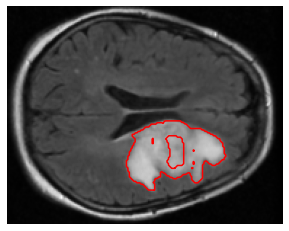

In [473]:
fname = 'TCGA-02-0085'
img = nib.load(f"/data/private_data/gbm/gbm_4d_susan/images/{fname}.nii.gz").get_fdata().astype(np.float32)
label = nib.load(f"/data/private_data/gbm/gbm_4d_susan/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)
predict = np.load(f"/data/newdata/gbm_infer/gbm_6_histogram_300/6_histogram_fold_2/predictions_best_epoch=243-dice_mean=74_42_task=31.2_fold=2_tta/{fname}.npy.npz")['arr_0']
mask = to_lbl(predict)
print(mask.shape)
print(img.shape)
print(label.shape)
l = np.argsort(label.sum(axis=(0,1)))[-1:]
print(l)
draw_contours(img[:, :, l, 0],mask[:,:,l].squeeze())

In [438]:
!cd /data/private_data/ && ls

bgpd  ct  gbm  grand_challenge	schw  self_supervision


In [422]:
!cd /results/gbm_infer/ && ls

6_histogram_fold_0  gbm_4a_resamp_100	       gbm_4b_n4_unetr_param
6_histogram_fold_1  gbm_4a_resamp_aug	       gbm_4d_susan
6_histogram_fold_2  gbm_4a_resamp_ct1	       gbm_4d_susan_unetr_param
gbm_1_reg_train     gbm_4a_resamp_flair        gbm_5_ss_shared
gbm_2a_interp	    gbm_4a_resamp_unetr_param  gbm_5_ss_shared_unetr_param
gbm_3a_atlas	    gbm_4a_resamp_wo_z
gbm_4a_resamp	    gbm_4b_n4


In [436]:
!cd /data/newdata/gbm_infer/gbm_6_histogram_300/6_histogram_fold_2  && ls

'predictions_best_epoch=243-dice_mean=74_42_task=31.2_fold=2_tta'


In [564]:
def load_nifty(directory, suffix):
    return nib.load(f'{directory}/{suffix}.nii.gz').get_fdata()

def load_channels(d):
    return [load_nifty(d, suffix) for suffix in ["FLAIR", "T1", "CT1", "T2"]]
def draw_contours(image, mask):
    """Draw 3 x 4 matplotlib axes with imshow 3D slice and GTV contour overlay."""
    
#     assert(image.shape == mask.shape)
    contours = find_contours(mask)
    fig = plt.figure(figsize=(8,4))
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    for cont in range(len(contours)):
            plt.plot(contours[cont][:, 1], contours[cont][:, 0], c='r');
    plt.show()

In [516]:
!cd /data_anvar/private_datasets/glioma_burdenko && find -name '102_19_4'

./brats_pipeline_out/102_19_4
./dcm2nii_hd_glio_auto/102_19_4
./dcm2nii_training_set_GOST/102_19_4
./dcm2nii_brats_toolkit_captk/102_19_4
./glioma_raw_dicoms_all/burdenko_iplan_plus_contours/GB_Eclipse_Export_MR_cont_Anon/102_19_4
./temp_folders/dcm2nii_brats_hd_glio/102_19_4
./temp_folders/dcm2nii_training_set/102_19_4
./temp_folders/dcm2nii_training_set/102_19_4/102_19_4
./temp_folders/glioma_burdenko_nii_gz/102_19_4


In [558]:
!cd /data_anvar/private_datasets/glioma_burdenko/temp_folders/dcm2nii_training_set/102_19_4/102_19_4 && ls

FL_rai.nii.gz		T1CE_to_SRI.nii.gz	  T2_raw.nii.gz
FL_rai_n4.nii.gz	T1CE_to_SRI_brain.nii.gz  T2_to_SRI.nii.gz
FL_raw.nii.gz		T1_rai.nii.gz		  T2_to_SRI_brain.nii.gz
FL_to_SRI.nii.gz	T1_rai_n4.nii.gz	  T2_to_T1CE.mat
FL_to_SRI_brain.nii.gz	T1_raw.nii.gz		  brainMask_SRI.nii.gz
FL_to_T1CE.mat		T1_to_SRI.nii.gz	  brainTumorMask_SRI.nii.gz
T1CE_rai.nii.gz		T1_to_SRI_brain.nii.gz	  dmOut_skull
T1CE_rai_n4.nii.gz	T1_to_T1CE.mat		  dmOut_tumor
T1CE_raw.nii.gz		T2_rai.nii.gz
T1CE_to_SRI.mat		T2_rai_n4.nii.gz


(256, 256, 120)
(256, 256, 64)
[67]


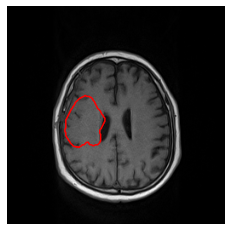

In [571]:
image_name = '102_19_4'
PATH_TO_IMG='/data_anvar/private_datasets/glioma_burdenko/temp_folders/glioma_burdenko_nii_gz'
file_img = os.path.join(PATH_TO_IMG, image_name)
file_label =  os.path.join(PATH_TO_IMG, image_name, 'mask_GTV_FLAIR.nii.gz')
flair, t1, t1ce, t2 = load_channels(file_img)
label = nib.load(file_label).get_fdata().astype(np.uint8)
lab = img_as_ubyte(exposure.rescale_intensity(label))
print(lab.shape)
print(t2.shape)
l = np.argsort(label.sum(axis=(0,1)))[-1:]
print(l)
draw_contours(t1[:, :, l],  lab[:,:,l].squeeze())

(240, 240, 155)
[  0  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113  98  97
  96  95  79  80  81  82  83  84  85 114  86  88  89  90  91  92  93  94
  87  78 115 117 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 137 136 135 134 118 119 120 121 122 123 124 116 125 127 128 129 130
 131 132 133 126 153  77  75  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  20  19  18  17   1   2   3   4   5   6   7  36   8  10
  11  12  13  14  15  16   9  76  37  39  74  73  72  71  70  38 154  40
  41  42  43  69  68  67  44  45  66  65  64  63  62  46  61  60  59  58
  57  47  56  55  48  54  50  53  49  51  52]


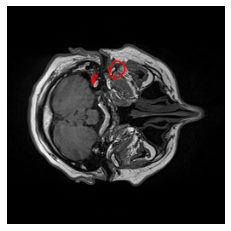

In [562]:
def load_channels(d):
    return [load_nifty(d, suffix) for suffix in ["FL_raw", "T1_raw", "T1CE_raw", "T2_raw"]]
image_name = '102_19_4'
PATH_TO_IMG='/data_anvar/private_datasets/glioma_burdenko/temp_folders/dcm2nii_training_set/102_19_4'
file_img = os.path.join(PATH_TO_IMG, image_name)
file_label =  os.path.join(PATH_TO_IMG, image_name, 'brainTumorMask_SRI.nii.gz')
flair, t1, t1ce, t2 = load_channels(file_img)
label = nib.load(file_label).get_fdata().astype(np.uint8)
lab = img_as_ubyte(exposure.rescale_intensity(label))
print(label.shape)
l = np.argsort(label.sum(axis=(0,1)))[-1:]
print(np.argsort(label.sum(axis=(0,1))))
l=52
draw_contours(t1[:, :, l],  lab[:,:,l].squeeze())

In [443]:
gbm_to_bgpd =  np.array( [0.017,
0.025,
0.021,
-0.002,
0.021,
0.018,
0.016,
-0.008])

gbm_100 =  np.array( [42.3,
83.1,
83.6,
83.7,
82.7,
83.8,
82.1,
86.0])


bgpd_to_gbm =  np.array([0.008,
0.027,
0.022,
0.019,
0.023,
0.025,
0.015,
0.007])

bgpd_100 = np.array(
[34.1,
70.2,
71.6,
71.4,
70.6,
70.9,
72.0,
75.3])



list_tcs = ['1 reg',
'2a interp',
'3a atlas',
'4a resamp',
'4 n4',
'4 susan',
'4 hist',
'5 ss']

bgpd_300 = np.array( [
35.9,
72.3,
74.9,
73.4,
74.6,
73.6,
74.6,
75.7,])

gbm_300 = np.array( [
    
43.6,
84.8,
84.6,
85.0,
82.4,
84.5,
83.3,
86.6,])

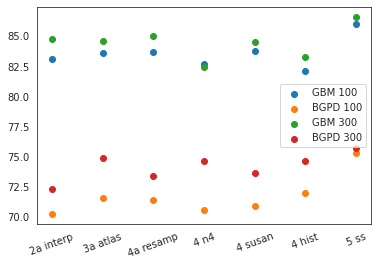

In [444]:
# plt.plot(np.arange(1,8),(gbm_to_bgpd*100+gbm_100)[1:] )
# plt.plot(np.arange(1,8),(bgpd_to_gbm*100+bgpd_100 )[1:])
plt.scatter(np.arange(1,8), (gbm_100)[1:], label = 'GBM 100')
plt.scatter(np.arange(1,8), bgpd_100[1:], label = 'BGPD 100')

plt.scatter(np.arange(1,8), (gbm_300)[1:], label = 'GBM 300')
plt.scatter(np.arange(1,8), bgpd_300[1:], label = 'BGPD 300')
# plt.hlines(0,0, 8)
plt.xticks(np.arange(1,8),list_tcs[1:],  rotation=20);
plt.legend();


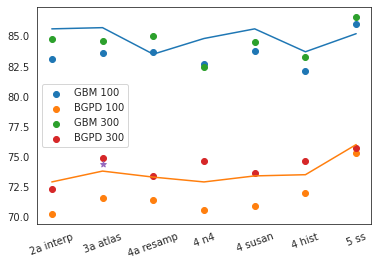

In [445]:
plt.plot(np.arange(1,8),(gbm_to_bgpd*100+gbm_100)[1:] )
plt.plot(np.arange(1,8),(bgpd_to_gbm*100+bgpd_100 )[1:])
plt.scatter(np.arange(1,8), (gbm_100)[1:], label = 'GBM 100')
plt.scatter(np.arange(1,8), bgpd_100[1:], label = 'BGPD 100')

plt.scatter(np.arange(1,8), (gbm_300)[1:], label = 'GBM 300')
plt.scatter(np.arange(1,8), bgpd_300[1:], label = 'BGPD 300')
plt.scatter(2, 74.4, marker ='*')
# plt.hlines(0,0, 8)
plt.xticks(np.arange(1,8),list_tcs[1:],  rotation=20);
plt.legend();

In [5]:
!cd ../.. && tar -czvf nnUnet_01.12.tar.gz nnUNet

nnUNet/
nnUNet/egd.ipynb
nnUNet/Dockerfile
nnUNet/scripts_training/
nnUNet/scripts_training/metrics.py
nnUNet/scripts_training/05_gbm_1_reg_aug.py
nnUNet/scripts_training/gbm_3a_atlas.sh
nnUNet/scripts_training/45_bgpd_2a_interp_unetr.sh
nnUNet/scripts_training/18.0_gbm_6_histogram_fold0.sh
nnUNet/scripts_training/16_gbm_7a_resample.sh
nnUNet/scripts_training/gbm_1_reg.py
nnUNet/scripts_training/TCGA-02-0006/
nnUNet/scripts_training/52_infer_lgg_4a_resamp_from_gbm_4a_resamp-Copy1.sh
nnUNet/scripts_training/55_tl_bgpd_4d_susan_from_gbm_4d_.sh
nnUNet/scripts_training/13_gbm_2a_interp_aug.sh
nnUNet/scripts_training/schw_seed.json
nnUNet/scripts_training/25_gbm_4a_resample_with_aug.sh
nnUNet/scripts_training/11_gbm_3a_susan.sh
nnUNet/scripts_training/59_SCHW_3a_atlas.sh
nnUNet/scripts_training/23_schw_2a_interp.sh
nnUNet/scripts_training/47_bgpd_4b_n4_unetr_new.sh
nnUNet/scripts_training/36_gbm_5_ss_shared.sh
nnUNet/scripts_training/48_bgpd_4d_susan_unetr.sh
nnUNet/scripts_training/57_bgpd